In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
#importing the dataset
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Exploratory Data Analysis

### EDA of variable

In [3]:
# checking for null values
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
#chcking descriptive statistics results
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
# defining function for EDA
def conti_var(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16,5),tight_layout=True)

    axes[0].set_title('Distribution')
    sns.histplot(x,ax=axes[0])
    axes[0].grid()

    axes[1].set_title('Outliers')
    sns.boxplot(x,ax=axes[1])

    axes[2].set_title('relaation wrt to output variable')
    sns.boxplot(x=data.Potability,y=x)
    axes[2].grid()

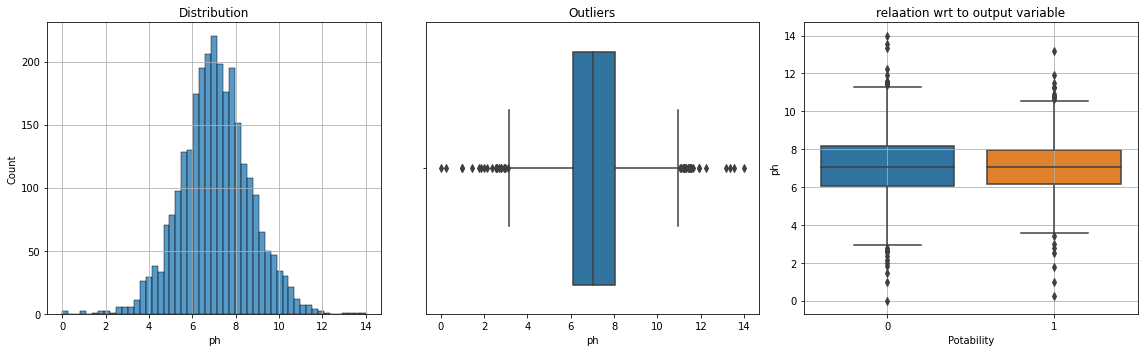

In [6]:
#EDA of Ph variable
conti_var(data.ph)

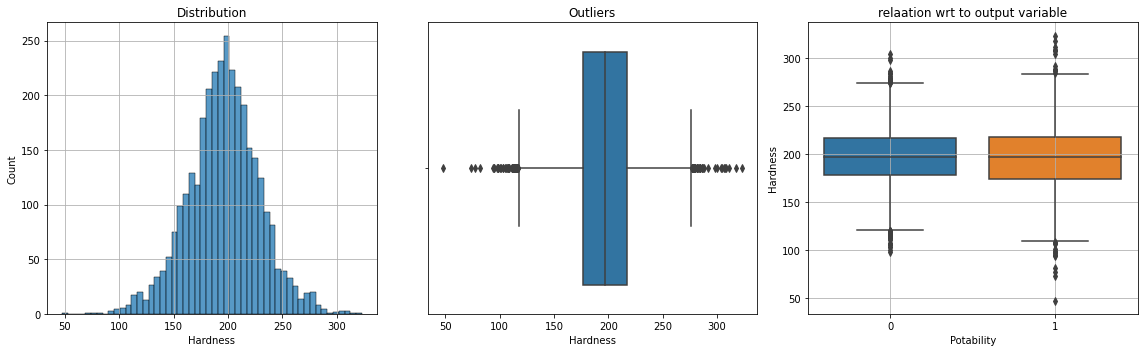

In [7]:
#EDA of Hardness variable
conti_var(data.Hardness)

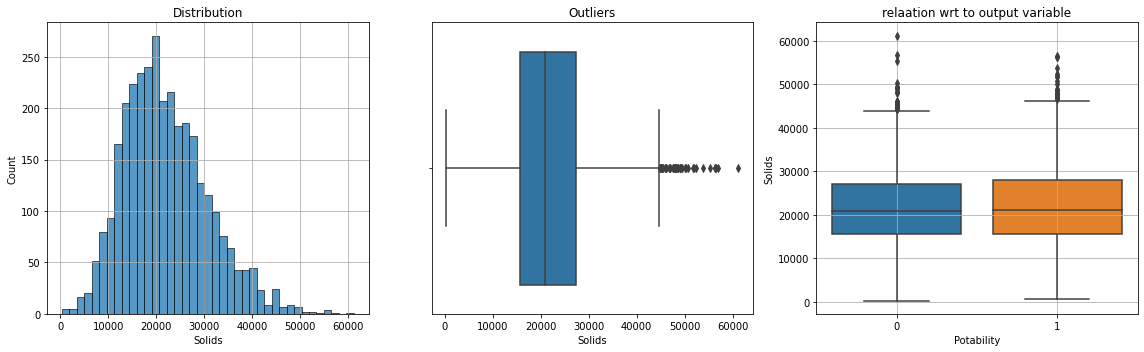

In [8]:
#EDA of solids
conti_var(data.Solids)

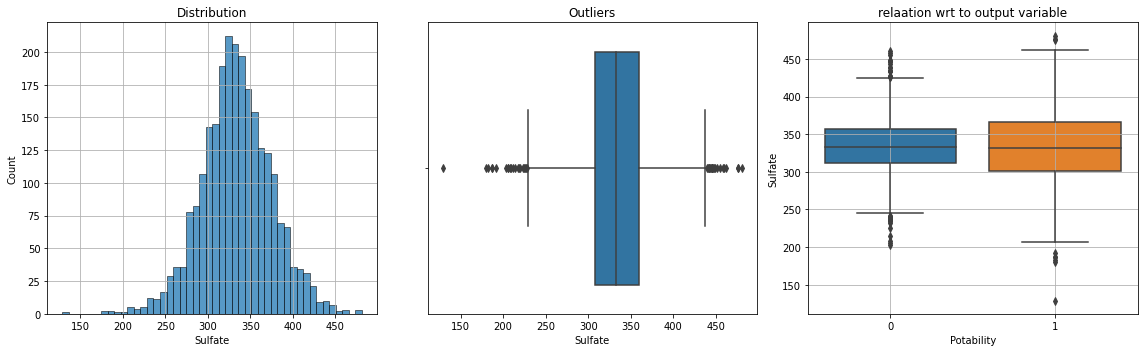

In [9]:
#EDA of sulfates
conti_var(data.Sulfate)

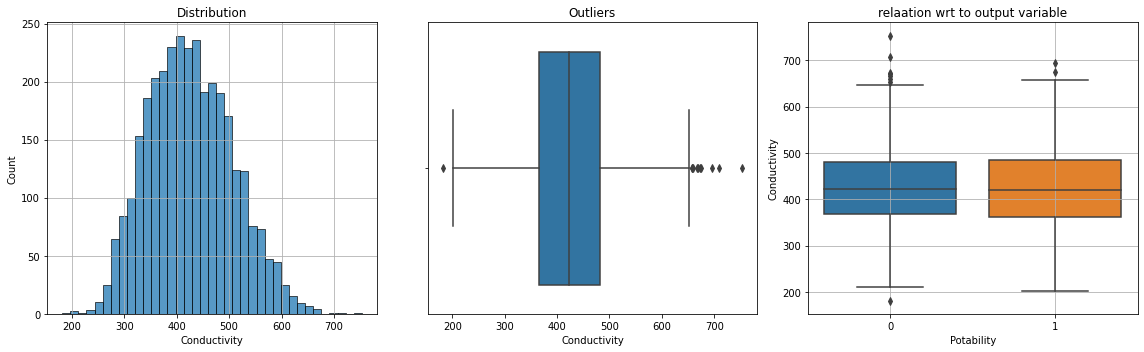

In [10]:
#EDA of Conductivity variable
conti_var(data.Conductivity)

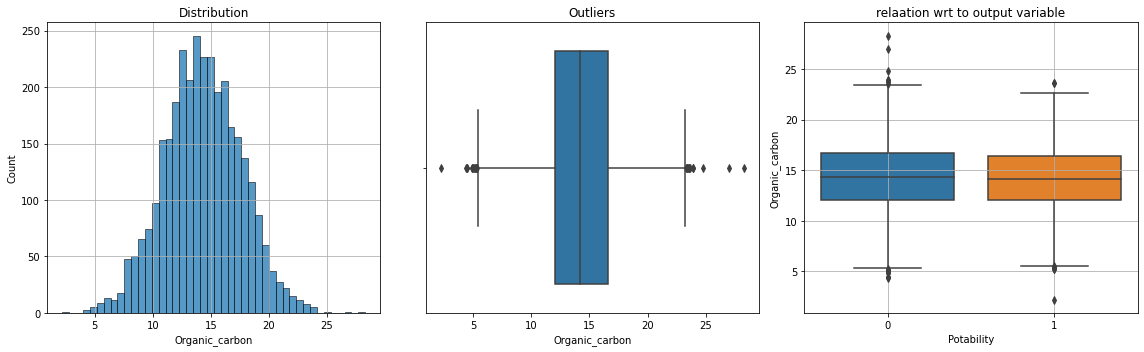

In [11]:
# EDA of Organic_carbon variable
conti_var(data.Organic_carbon)

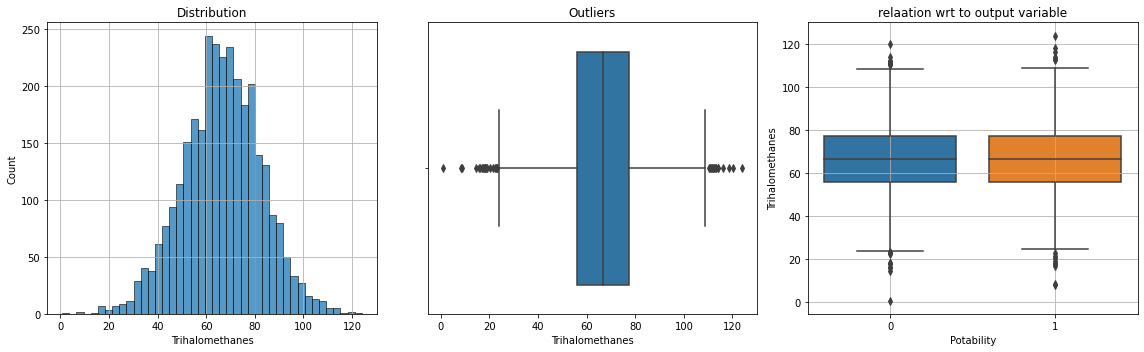

In [12]:
# EDA of Trihalomethanes variable
conti_var(data.Trihalomethanes)

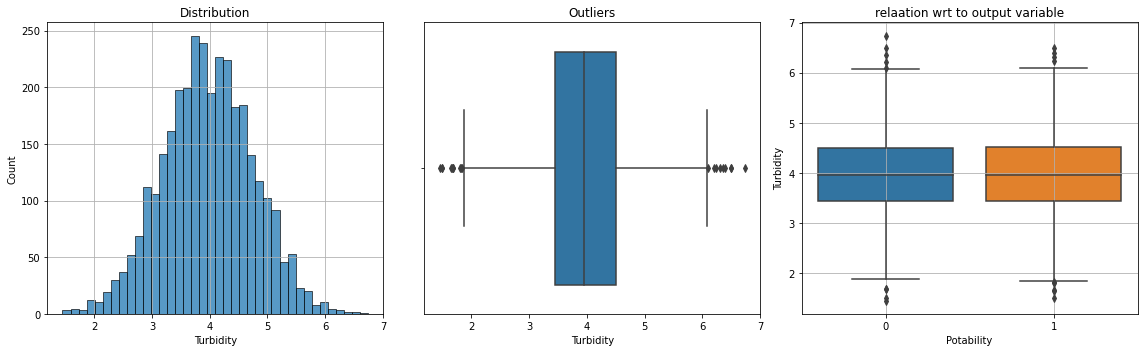

In [13]:
# EDA of Turbidity variable
conti_var(data.Turbidity)

In [14]:
#checking output variable for unbalanced dataset
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

From the above EDA, observations are
1. Its not a unbalanced dataset.
2. Almost all the input variables are normally distributed

### Imputing missing values

In [15]:
# Since Trihalomethanes and pH has less number of missing values, they are imputed with median value
data.ph.fillna(data.ph.median(),inplace=True)
data.Trihalomethanes.fillna(data.Trihalomethanes.median(),inplace=True)

In [16]:
#splitting the data
test_x = data[data.Sulfate.isna()].drop('Sulfate',axis=1)
train_x = data[data.Sulfate.notna()].drop('Sulfate',axis=1)
train_y = data.Sulfate[data.Sulfate.notna()]

#splitting the shape of splitted data
print('train_x = {}, train_y={}, test_x={}'.format(train_x.shape,train_y.shape,test_x.shape))

train_x = (2495, 9), train_y=(2495,), test_x=(781, 9)


In [17]:
#since sulfate variable has more missing values, they are filled with linear regression algorithm
#importing missing values
from sklearn.linear_model import LinearRegression

#initializing the model
lin = LinearRegression()

#fitting the model
lin.fit(train_x,train_y)

#predicting the missing values
for i in data[data.Sulfate.isna()].index:
    data.Sulfate[i] = lin.predict([data.loc[i,data.columns != 'Sulfate']])

<AxesSubplot:>

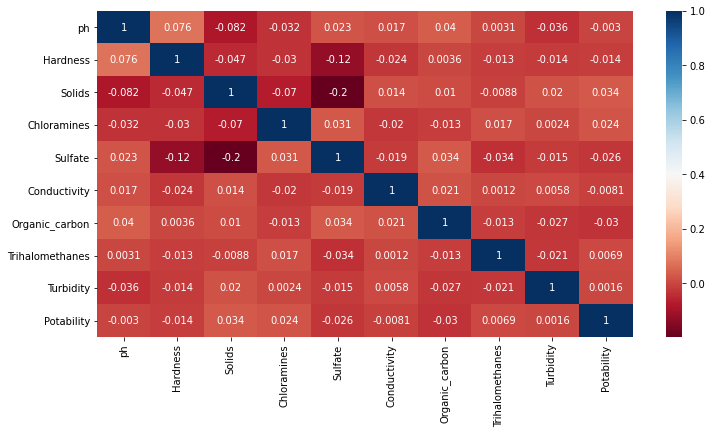

In [18]:
# checking the corealtion
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

## Feature Selection

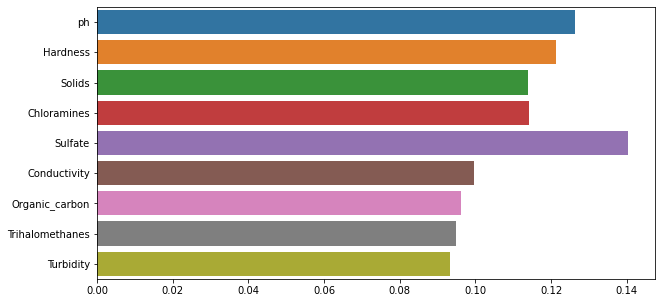

In [19]:
#Feature selection using random forest feature importance
#importing the libraries
from sklearn.ensemble import RandomForestClassifier

#initializing the model
ran = RandomForestClassifier()

#fitting the model
ran.fit(data.drop('Potability',axis=1),data.Potability)

plt.figure(figsize=(10,5))
sns.barplot(x=ran.feature_importances_,y=data.drop('Potability',axis=1).columns)
plt.show()

Since there is not much significance will be derived from above plot all the input variables are considered for prediction

In [20]:
#splitting the data into input and output
x = data.drop(['Potability','Organic_carbon'],axis=1)
y = data.Potability

print('input shape={}, output shape={}'.format(x.shape,y.shape))

input shape=(3276, 8), output shape=(3276,)


In [21]:
#Standard scalar is used to avoid scaling effect
#importing the libraries
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

#fitting scalar model for input data
x = pd.DataFrame(scalar.fit_transform(x),columns=x.columns)

In [22]:
#splitting entire data into 80% train and 20% test
# importing the libraries
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

print('Shape of Splitting:')
print('x_train={},y_train={},x_test={},y_test={}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting:
x_train=(2620, 8),y_train=(2620,),x_test=(656, 8),y_test=(656,)


## Building the model

### Logistic regression model

Report: 
               precision    recall  f1-score   support

           0       0.57      1.00      0.72       373
           1       0.00      0.00      0.00       283

    accuracy                           0.57       656
   macro avg       0.28      0.50      0.36       656
weighted avg       0.32      0.57      0.41       656

confusion matrix:


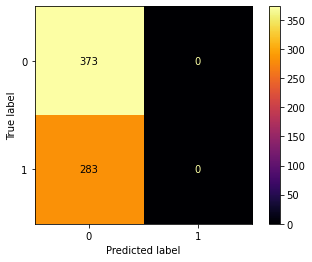

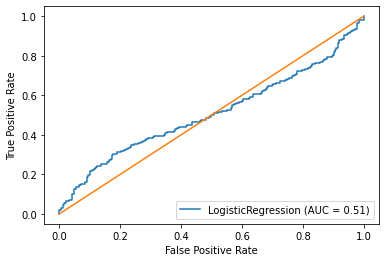

In [23]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score

#initializing the model
logis = LogisticRegression()

#fitting and predicting for test data
pred_logis = logis.fit(x_train,y_train).predict(x_test)

#printing the report
print('Report: \n',classification_report(y_test,pred_logis))

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(logis,x_test,y_test,cmap='inferno')
plt.show()

#plotting the ROC curve
plot_roc_curve(logis,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

#accuracy score
acc_logis = accuracy_score(y_test,pred_logis)

### KNN model

Report: 
               precision    recall  f1-score   support

           0       0.64      0.81      0.72       373
           1       0.62      0.41      0.49       283

    accuracy                           0.64       656
   macro avg       0.63      0.61      0.61       656
weighted avg       0.63      0.64      0.62       656

confusion matrix:


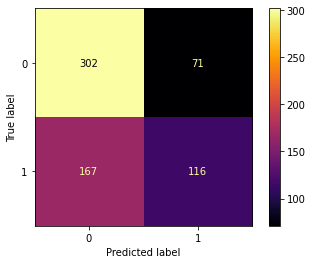

ROC curve :


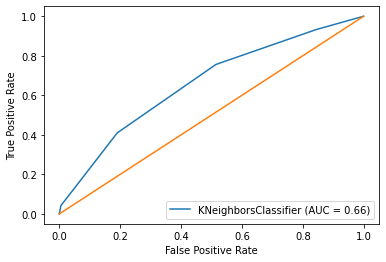

In [24]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier

#initializing the model
knn = KNeighborsClassifier()

#fitting and predicting for test data
pred_knn = knn.fit(x_train,y_train).predict(x_test)

#printing the report
print('Report: \n',classification_report(y_test,pred_knn))

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(knn,x_test,y_test,cmap='inferno')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(knn,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

In [25]:
#checking hyper parameters
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   10.2s finished


Best score = 0.6503831794237324
Best params = {'n_neighbors': 20}
Report: 
               precision    recall  f1-score   support

           0       0.62      0.93      0.74       373
           1       0.72      0.24      0.36       283

    accuracy                           0.63       656
   macro avg       0.67      0.58      0.55       656
weighted avg       0.66      0.63      0.58       656

confusion matrix:


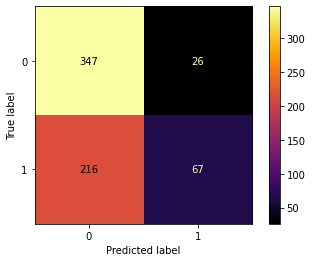

ROC curve :


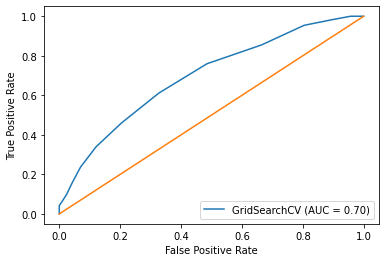

In [26]:
#hyper parameters
params = {'n_neighbors':range(1,25)}

#initializing the grid
grid_knn = GridSearchCV(estimator=knn,param_grid=params,cv=3,verbose=3,n_jobs=-1)

#fitting for test data
pred_knn = grid_knn.fit(x_train,y_train).predict(x_test)

#printing best score and parameters
print('Best score = {}\nBest params = {}'.format(grid_knn.best_score_,grid_knn.best_params_))

#printing the report
print('Report: \n',classification_report(y_test,pred_knn))

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(grid_knn,x_test,y_test,cmap='inferno')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(grid_knn,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

#accuracy score
acc_knn = accuracy_score(y_test,pred_knn)

### SVM model

Report: 
               precision    recall  f1-score   support

           0       0.64      0.94      0.76       373
           1       0.78      0.30      0.44       283

    accuracy                           0.66       656
   macro avg       0.71      0.62      0.60       656
weighted avg       0.70      0.66      0.62       656

confusion matrix:


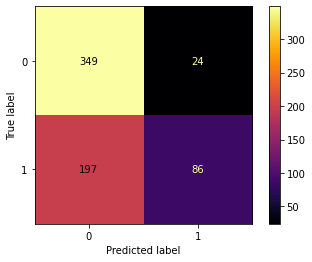

ROC curve :


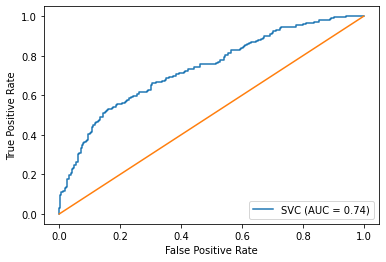

In [27]:
#importing libraries
from sklearn.svm import SVC

#initializing the model
svm = SVC()

#fitting and predicting for test data
pred_svm = svm.fit(x_train,y_train).predict(x_test)

#printing the report
print('Report: \n',classification_report(y_test,pred_svm))

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(svm,x_test,y_test,cmap='inferno')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(svm,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

In [28]:
#checking hyper parameters
svm.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    8.8s finished


Best score = 0.6736649008346856
Best params = {'C': 1, 'kernel': 'rbf'}
Report: 
               precision    recall  f1-score   support

           0       0.64      0.94      0.76       373
           1       0.78      0.30      0.44       283

    accuracy                           0.66       656
   macro avg       0.71      0.62      0.60       656
weighted avg       0.70      0.66      0.62       656

confusion matrix:


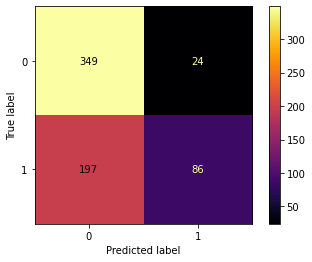

ROC curve :


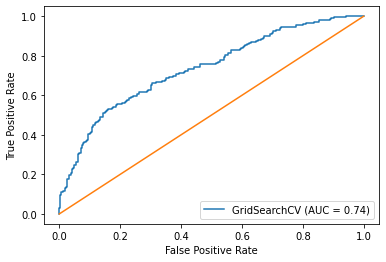

In [29]:
#hyper parameters
params = {'C':[0.001,0.01,0.1,1,10],
          'kernel':['linear', 'poly', 'rbf']}

#initializing the grid
grid_svm = GridSearchCV(estimator=svm,param_grid=params,cv=3,verbose=3,n_jobs=-1)

#fitting for test data
pred_svm = grid_svm.fit(x_train,y_train).predict(x_test)

#printing best score and parameters
print('Best score = {}\nBest params = {}'.format(grid_svm.best_score_,grid_svm.best_params_))

#printing the report
print('Report: \n',classification_report(y_test,pred_svm))

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(grid_svm,x_test,y_test,cmap='inferno')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(grid_svm,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

#accuracy score
acc_svm = accuracy_score(y_test,pred_svm)

### Decision tree model

Report: 
               precision    recall  f1-score   support

           0       0.64      0.66      0.65       373
           1       0.54      0.52      0.53       283

    accuracy                           0.60       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.60      0.60      0.60       656

confusion matrix:


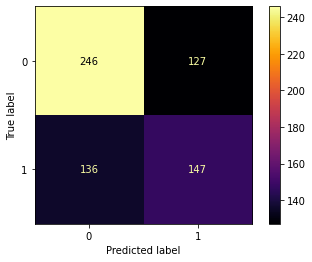

ROC curve :


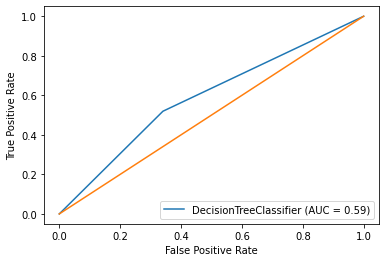

In [30]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier

#initializing the model
deci = DecisionTreeClassifier()

#fitting and predicting for test data
pred_deci = deci.fit(x_train,y_train).predict(x_test)

#printing the report
print('Report: \n',classification_report(y_test,pred_deci))

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(deci,x_test,y_test,cmap='inferno')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(deci,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

### Random Forest Model

Report: 
               precision    recall  f1-score   support

           0       0.64      0.92      0.75       373
           1       0.75      0.33      0.45       283

    accuracy                           0.66       656
   macro avg       0.69      0.62      0.60       656
weighted avg       0.69      0.66      0.62       656

confusion matrix:


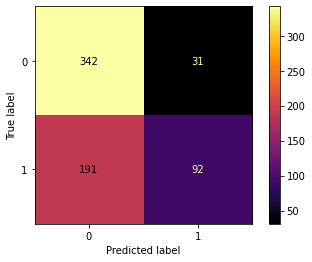

ROC curve :


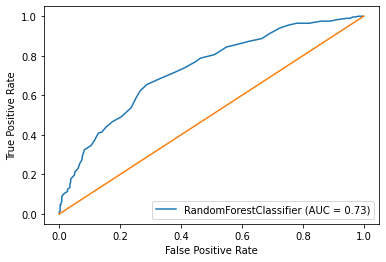

In [31]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier

#initializing the model
rand = RandomForestClassifier()

#fitting and predicting for test data
pred_rand = rand.fit(x_train,y_train).predict(x_test)

#printing the report
print('Report: \n',classification_report(y_test,pred_rand))

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(rand,x_test,y_test,cmap='inferno')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(rand,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

In [32]:
#checking for hyper parameters
rand.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  2.2min finished


Best score = 0.6694656982113635
Best params = {'max_depth': 25, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}
Report: 
               precision    recall  f1-score   support

           0       0.61      0.94      0.74       373
           1       0.72      0.22      0.34       283

    accuracy                           0.63       656
   macro avg       0.67      0.58      0.54       656
weighted avg       0.66      0.63      0.57       656

confusion matrix:


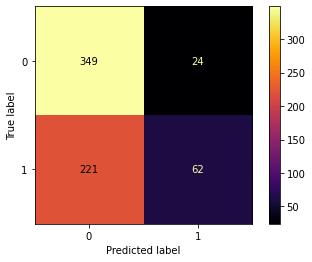

ROC curve :


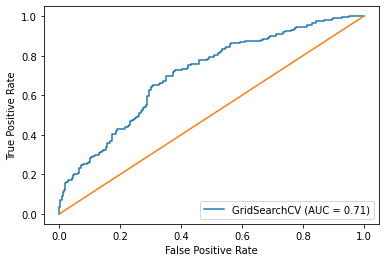

In [33]:
#hyper parameters
params = {'max_depth':[15,20,25],
          'min_samples_leaf':[10,20,30],
          'min_samples_split':[10,20,30],
          'n_estimators' : [200,250,300]
         }
#initializing the grid
grid_rand = GridSearchCV(estimator=rand,param_grid=params,cv=3,verbose=3,n_jobs=-1)

#fitting for test data
pred_rand = grid_rand.fit(x_train,y_train).predict(x_test)

#printing best score and parameters
print('Best score = {}\nBest params = {}'.format(grid_rand.best_score_,grid_rand.best_params_))

#printing the report
print('Report: \n',classification_report(y_test,pred_rand))

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(grid_rand,x_test,y_test,cmap='inferno')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(grid_rand,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

#accuracy score
acc_rand = accuracy_score(y_test,pred_rand)

### XGBoost model

[12:00:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Report: 
               precision    recall  f1-score   support

           0       0.63      0.78      0.70       373
           1       0.58      0.40      0.48       283

    accuracy                           0.62       656
   macro avg       0.61      0.59      0.59       656
weighted avg       0.61      0.62      0.60       656

confusion matrix:


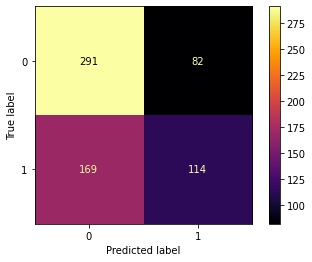

ROC curve :


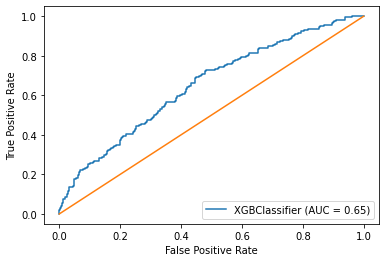

In [34]:
#importing libraries
from xgboost import XGBClassifier

#initializing the model
xgb = XGBClassifier()

#fitting and predicting for test data
pred_xgb = xgb.fit(x_train,y_train).predict(x_test)

#printing the report
print('Report: \n',classification_report(y_test,pred_xgb))

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(xgb,x_test,y_test,cmap='inferno')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(xgb,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

In [35]:
xgb.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.1min finished


[12:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best score = 0.6576321774604348
Best params = {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 350}
Report: 
               precision    recall  f1-score   support

           0       0.61      0.92      0.74       373
           1       0.70      0.23      0.34       283

    accuracy                           0.62       656
   macro avg       0.65      0.58      0.54       656
weighted avg       0.65      0.62      0.57       656

confusion matrix:


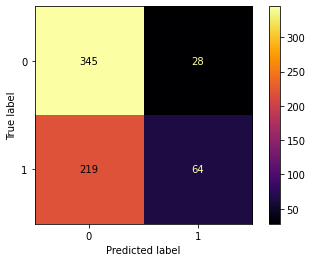

ROC curve :


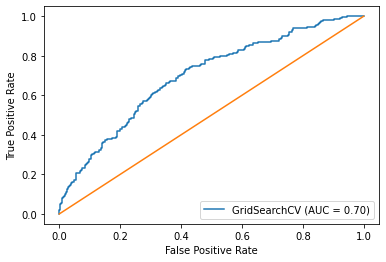

In [36]:
#hyper parameters
params = {'max_depth':[5,10,15],
          'learning_rate':[0.001,0.01,0.1],
          'n_estimators':[350,400,500]
         }
#initializing the grid
grid_xgb = GridSearchCV(estimator=xgb,param_grid=params,cv=3,verbose=3,n_jobs=-1)

#fitting for test data
pred_xgb = grid_xgb.fit(x_train,y_train).predict(x_test)

#printing best score and parameters
print('Best score = {}\nBest params = {}'.format(grid_xgb.best_score_,grid_xgb.best_params_))

#printing the report
print('Report: \n',classification_report(y_test,pred_xgb))

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(grid_xgb,x_test,y_test,cmap='inferno')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(grid_xgb,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

#accuracy score
acc_xgb = accuracy_score(y_test,pred_xgb)

## Conclusion

Prediction is very diffcult since records are close to each other prediction becomes difficult

All the built models produce less accuracy